<a href="https://colab.research.google.com/github/Himkeshtak/Deep-Learning/blob/main/Multi_input_complex_FunctionalAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import *
from keras.models import Model
from keras.utils import plot_model

In [ ]:
#define two sets of inputs
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

In [ ]:
#The first branch operates on first inputs
x = Dense (16, activation = "relu")(inputA)
x1 = Dense(32, activation = 'relu')(x)

In [ ]:
#the second branch operates on the second inputs
y = Dense(64, activation = 'relu')(inputB)
y1 = Dense(82, activation = 'relu')(y)
y2 = Dense(128, activation = 'relu')(y1)

In [ ]:
#combining the output of the two input stream
combined = concatenate([x1, y2])

In [ ]:
#applied a FC layer and then a regression prediction on the combined output
z = Dense(256, activation = 'relu')(combined)
z1 = Dense(128, activation = 'linear')(z)

In [ ]:
model = Model(inputs = [inputA, inputB], outputs = z1)

In [ ]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 64)        │      8,256 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 16)        │        528 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 82)        │      5,330 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 32)        │        544 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 128)       │     10,624 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 160)       │          0 │ dense_17[0][0],   │
│ (Concatenate)       │                   │            │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 256)       │     41,216 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 128)       │     32,896 │ dense_23[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 99,394 (388.26 KB)

 Trainable params: 99,394 (388.26 KB)

 Non-trainable params: 0 (0.00 B)

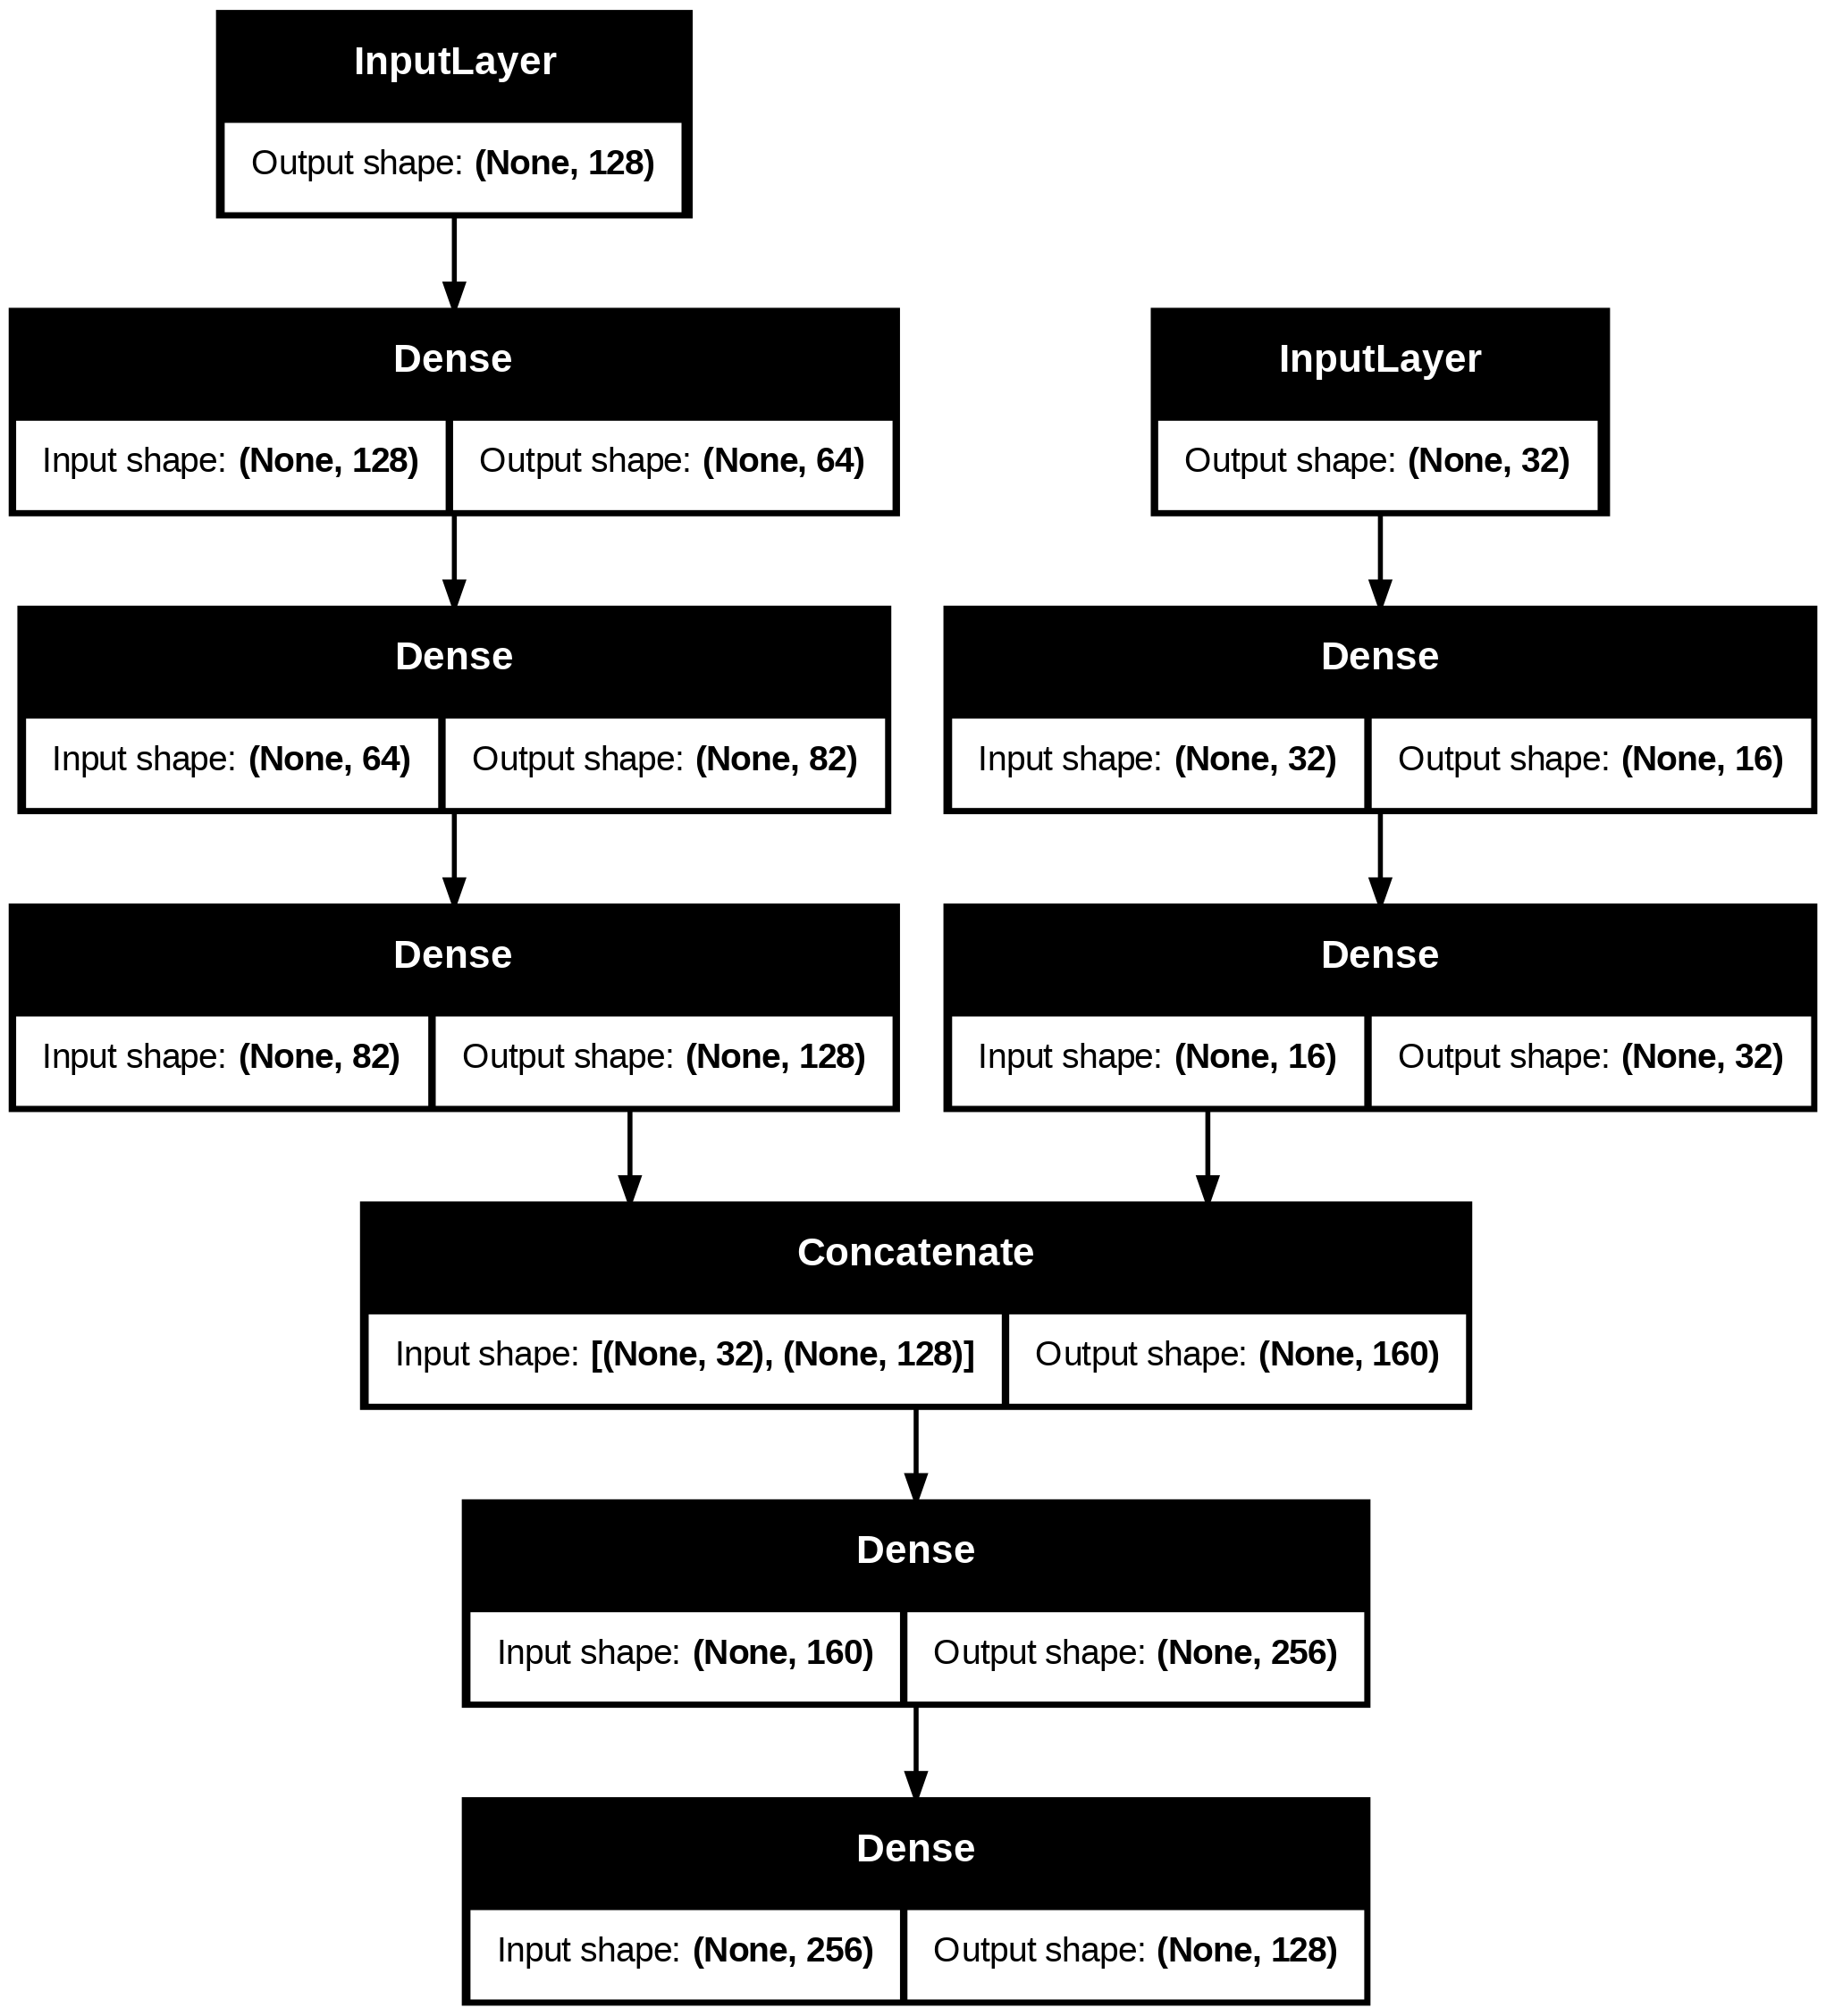

In [ ]:
plot_model(model, show_shapes=True)